# import necessary libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# import data

In [2]:
bank = pd.read_excel("C:/Users/kamalesh reddy/Downloads/Bank_Team_1/bank-full.xls")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data ingestion

In [3]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No missing values in our data

In [4]:
bank.shape

(45211, 17)

In [5]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [7]:
bank["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [8]:
bank["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [9]:
bank["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

# Data Analysis

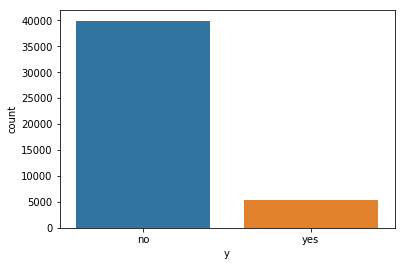

In [10]:
sns.countplot(bank["y"])

There is imbalanced in the data

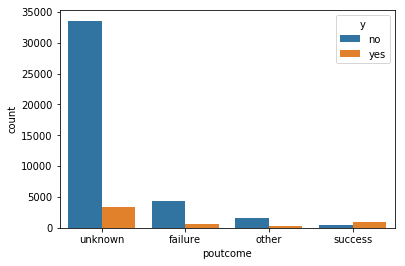

In [11]:
sns.countplot(x="poutcome",data=bank,hue="y")

More than 60% who has subcribed for the previous campaign,also subscribed for this campaign also,so i suggest to focus more on these kind of people

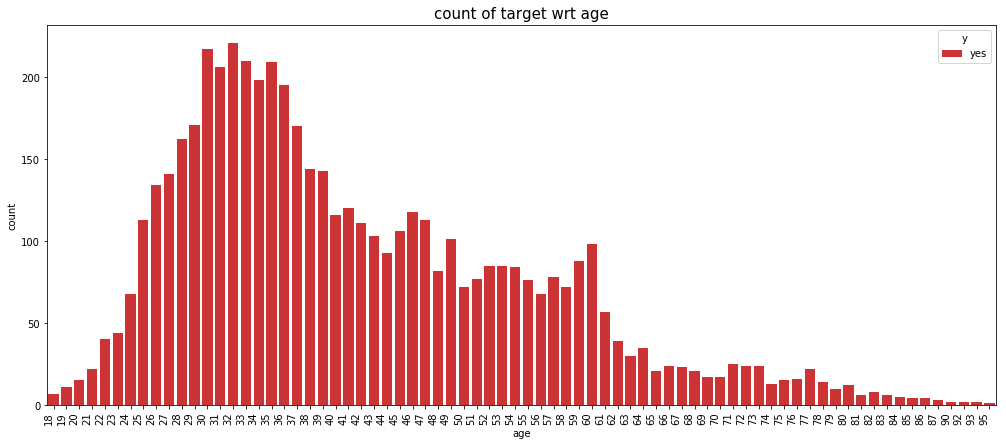

In [12]:
rcParams["figure.figsize"]=17,7
p = sns.countplot(x="age",hue="y",data=bank[bank["y"]=="yes"],palette="Set1")
p.set_xticklabels(p.get_xticklabels(),rotation=90,ha="right")
plt.title("count of target wrt age",size=15)
p

we want to focus more on age group between 26-60

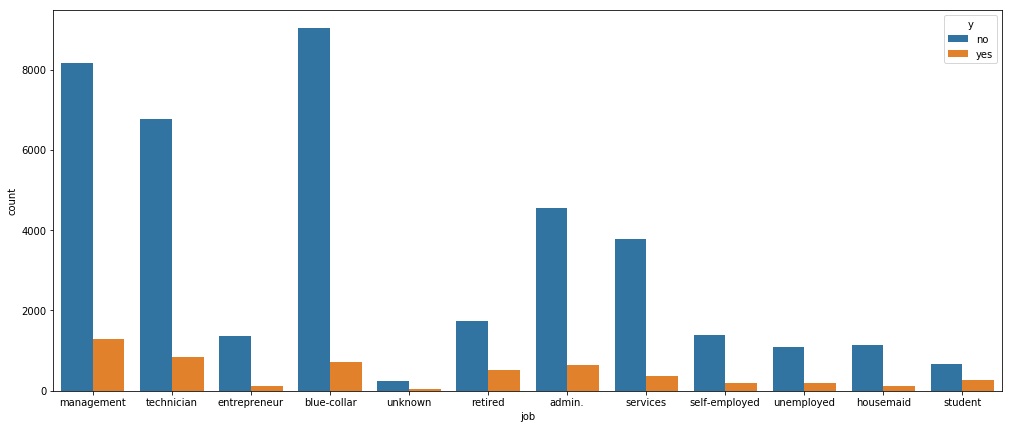

In [13]:
sns.countplot(x="job",hue="y",data=bank)

In [14]:
bank[bank["job"]=="student"]["y"].value_counts()

no     669
yes    269
Name: y, dtype: int64

students are easily convinced and subscribed for the term deposit

In [15]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
mar = bank.groupby(by="marital")
job = bank.groupby(by="job")
educ = bank.groupby(by="education")
default = bank.groupby(by="default")
house = bank.groupby(by="housing")
loan = bank.groupby(by="loan")
con = bank.groupby(by="contact")
mon = bank.groupby(by="month")
pout = bank.groupby(by="poutcome")

In [17]:
lis = []
for i in bank["job"].unique():
    b = job.get_group(i)
    lis.append(len(b[b["y"]=="yes"])/len(b))

In [18]:
subscribe_rate_job = pd.DataFrame({"job":bank["job"].unique(),"sub_rate":lis})

In [19]:
subscribe_rate_job.sort_values(by="sub_rate",ascending=False)

,job,sub_rate
11,student,0.286780
5,retired,0.227915
9,unemployed,0.155027
0,management,0.137556
6,admin.,0.122027
8,self-employed,0.118429
4,unknown,0.118056
1,technician,0.110570
7,services,0.088830
10,housemaid,0.087903


In [20]:
mar = bank.groupby(by="marital")

In [21]:
lis1 = []
for i in bank["marital"].unique():
    b = mar.get_group(i)
    lis1.append(len(b[b["y"]=="yes"])/len(b))

In [22]:
subscribe_rate_mar = pd.DataFrame({"marital":bank["marital"].unique(),"sub_rate":lis1})
subscribe_rate_mar.sort_values(by="sub_rate",ascending=False)

,marital,sub_rate
1,single,0.149492
2,divorced,0.119455
0,married,0.101235


In [23]:
lis2 = []
for i in bank["education"].unique():
    b = educ.get_group(i)
    lis2.append(len(b[b["y"]=="yes"])/len(b))
subscribe_rate_educ = pd.DataFrame({"education":bank["education"].unique(),"sub_rate":lis2})
subscribe_rate_educ.sort_values(by="sub_rate",ascending=False)

,education,sub_rate
0,tertiary,0.150064
2,unknown,0.135703
1,secondary,0.105594
3,primary,0.086265


In [24]:
lis3 = []
for i in bank["default"].unique():
    b = default.get_group(i)
    lis3.append(len(b[b["y"]=="yes"])/len(b))
subscribe_rate_def = pd.DataFrame({"default":bank["default"].unique(),"sub_rate":lis3})
subscribe_rate_def.sort_values(by="sub_rate",ascending=False)

,default,sub_rate
0,no,0.117961
1,yes,0.063804


In [25]:
lis4 = []
for i in bank["housing"].unique():
    b = house.get_group(i)
    lis4.append(len(b[b["y"]=="yes"])/len(b))
subscribe_rate_house = pd.DataFrame({"house":bank["housing"].unique(),"sub_rate":lis4})
subscribe_rate_house.sort_values(by="sub_rate",ascending=False)

,house,sub_rate
1,no,0.167024
0,yes,0.077000


In [26]:
lis5 = []
for i in bank["loan"].unique():
    b = loan.get_group(i)
    lis5.append(len(b[b["y"]=="yes"])/len(b))
subscribe_rate_loan = pd.DataFrame({"loan":bank["loan"].unique(),"sub_rate":lis5})
subscribe_rate_loan.sort_values(by="sub_rate",ascending=False)

,loan,sub_rate
0,no,0.126557
1,yes,0.066814


In [27]:
lis5 = []
for i in bank["contact"].unique():
    b = con.get_group(i)
    lis5.append(len(b[b["y"]=="yes"])/len(b))
subscribe_rate_con = pd.DataFrame({"contact":bank["contact"].unique(),"sub_rate":lis5})
subscribe_rate_con.sort_values(by="sub_rate",ascending=False)

,contact,sub_rate
1,cellular,0.149189
2,telephone,0.134205
0,unknown,0.040707


In [28]:
lis6 = []
for i in bank["month"].unique():
    b = mon.get_group(i)
    lis6.append(len(b[b["y"]=="yes"])/len(b))
subscribe_rate_mon = pd.DataFrame({"month":bank["month"].unique(),"sub_rate":lis6})
subscribe_rate_mon.sort_values(by="sub_rate",ascending=False)

,month,sub_rate
9,mar,0.519916
6,dec,0.467290
11,sep,0.464594
4,oct,0.437669
10,apr,0.196794
8,feb,0.166478
3,aug,0.110133
1,jun,0.102228
5,nov,0.101511
7,jan,0.101212


In [29]:
lis7 = []
for i in bank["poutcome"].unique():
    b = pout.get_group(i)
    lis7.append(len(b[b["y"]=="yes"])/len(b))
subscribe_rate_pout = pd.DataFrame({"poutcome":bank["poutcome"].unique(),"sub_rate":lis7})
subscribe_rate_pout.sort_values(by="sub_rate",ascending=False)

,poutcome,sub_rate
3,success,0.647253
2,other,0.166848
1,failure,0.126097
0,unknown,0.091615


In [30]:
subscription rate is more persons 

SyntaxError: invalid syntax (<ipython-input-30-2a70065a3e4a>, line 1)

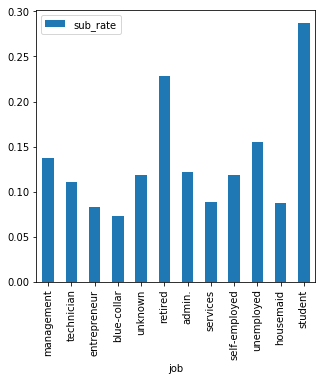

In [31]:
rcParams["figure.figsize"]=5,5
subscribe_rate_job.plot.bar(x="job",y="sub_rate")

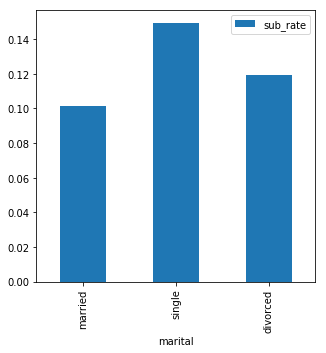

In [32]:
rcParams["figure.figsize"]=5,5
subscribe_rate_mar.plot.bar(x="marital",y="sub_rate")

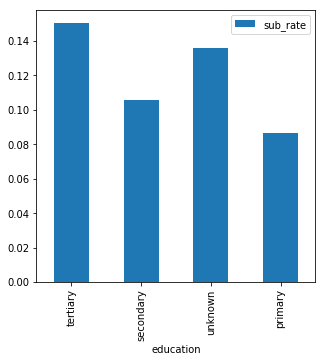

In [33]:
rcParams["figure.figsize"]=5,5
subscribe_rate_educ.plot.bar(x="education",y="sub_rate")

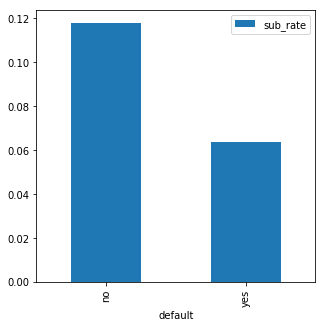

In [34]:
rcParams["figure.figsize"]=5,5
subscribe_rate_def.plot.bar(x="default",y="sub_rate")

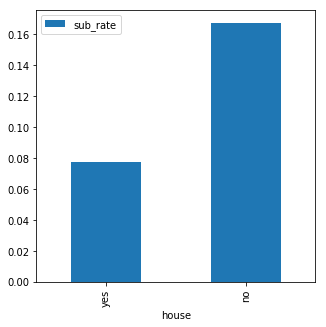

In [35]:
rcParams["figure.figsize"]=5,5
subscribe_rate_house.plot.bar(x="house",y="sub_rate")

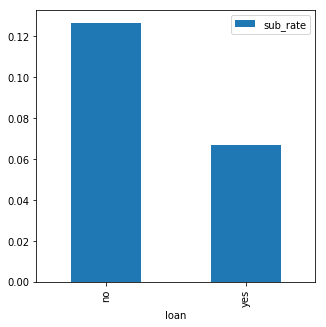

In [36]:
rcParams["figure.figsize"]=5,5
subscribe_rate_loan.plot.bar(x="loan",y="sub_rate")

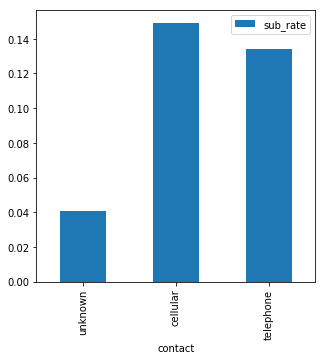

In [37]:
rcParams["figure.figsize"]=5,5
subscribe_rate_con.plot.bar(x="contact",y="sub_rate")

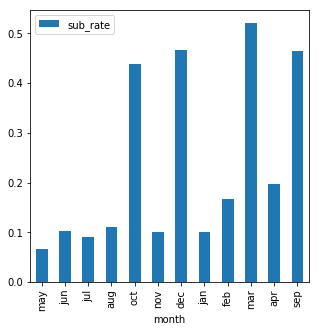

In [38]:
rcParams["figure.figsize"]=5,5
subscribe_rate_mon.plot.bar(x="month",y="sub_rate")

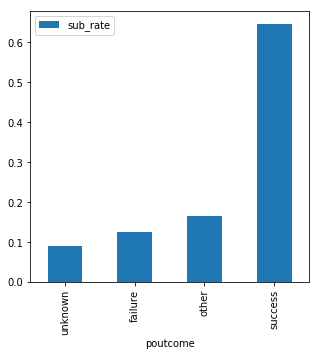

In [39]:
rcParams["figure.figsize"]=5,5
subscribe_rate_pout.plot.bar(x="poutcome",y="sub_rate")

In [40]:
k = bank.select_dtypes(include="object").columns

In [41]:
for i in k:
    bank[i] = bank[i].astype("category")
    

In [42]:
cat = bank.select_dtypes(include="category")

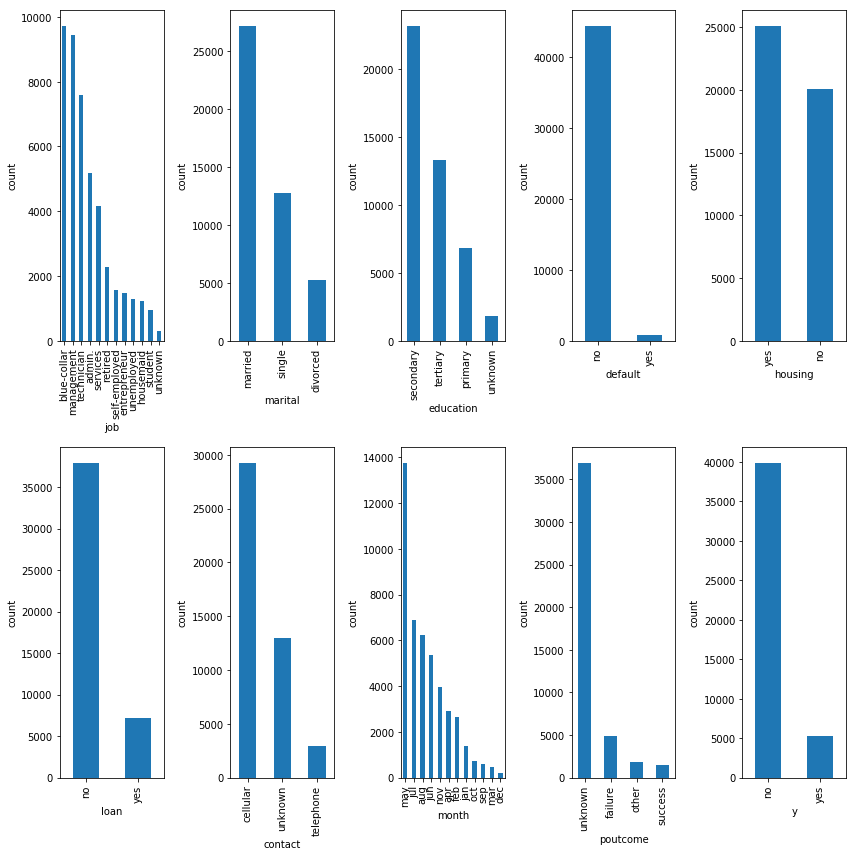

In [43]:
rcParams["figure.figsize"]=12,12
i = 1
for col in cat.columns:
    plt.subplot(2,5,i)
    bank[col].value_counts().plot.bar()
    i=i+1
    plt.xlabel(col)
    plt.ylabel("count")
plt.tight_layout()
plt.show()

In [44]:
col2 =bank.select_dtypes(include="integer").columns

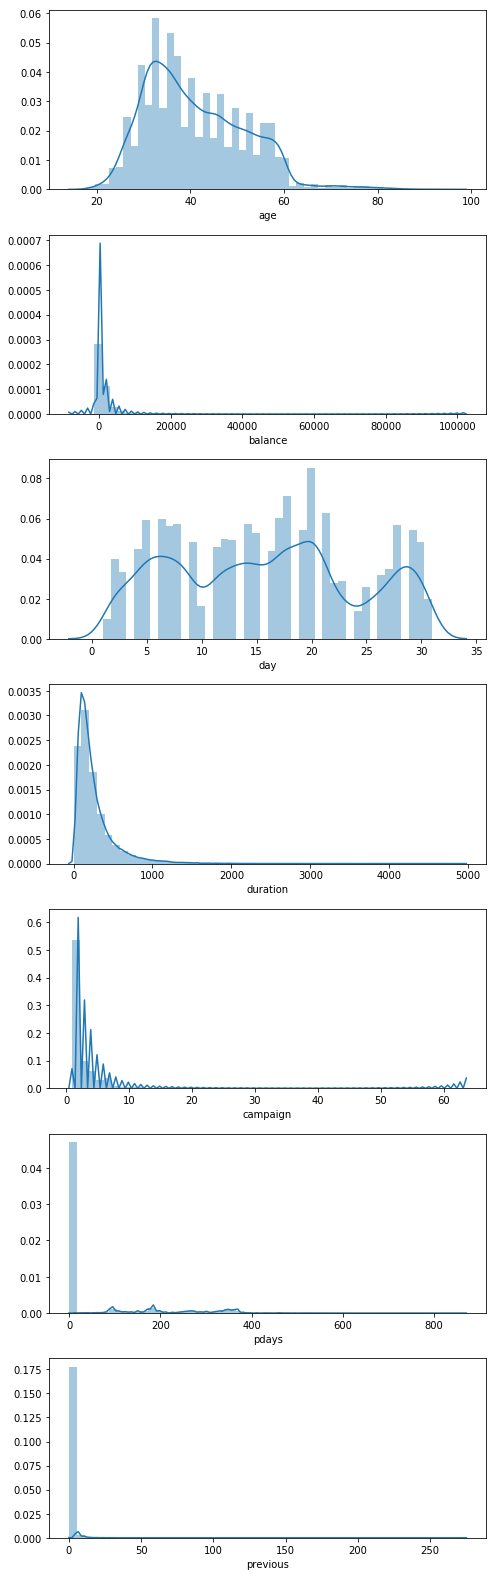

In [45]:
rcParams["figure.figsize"]=7,22
i=1
for c in col2:
    plt.subplot(7,1,i)
    sns.distplot(bank[c])
    i = i+1
plt.tight_layout()
plt.show()

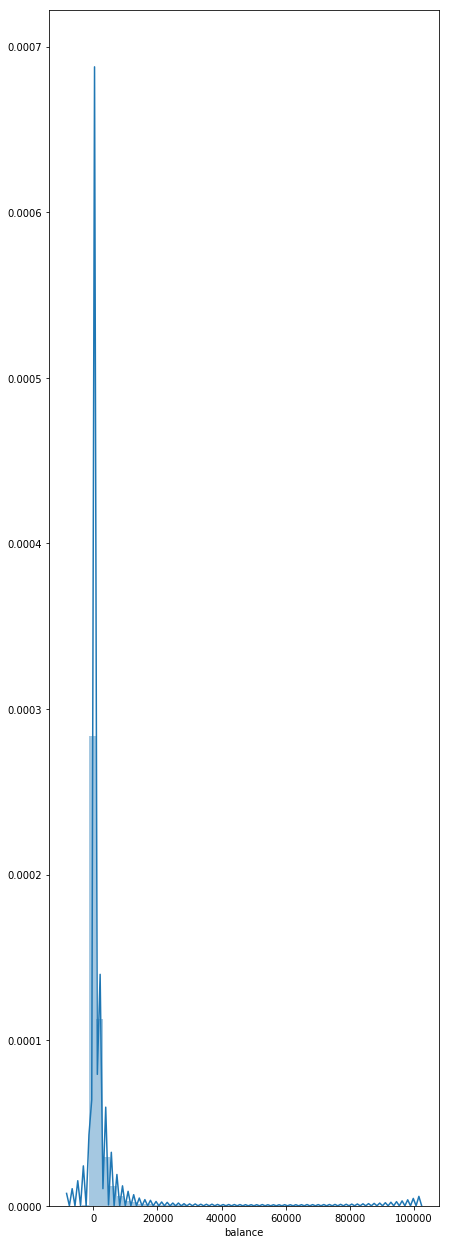

In [46]:
sns.distplot(bank["balance"])

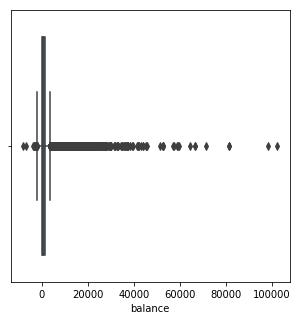

In [47]:
rcParams["figure.figsize"] = 5,5
sns.boxplot(bank["balance"])

THere are many extreme values in balance

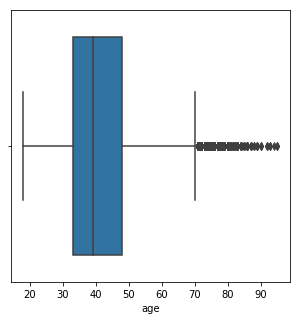

In [48]:
sns.boxplot(bank["age"])

in age as well there are some outliers

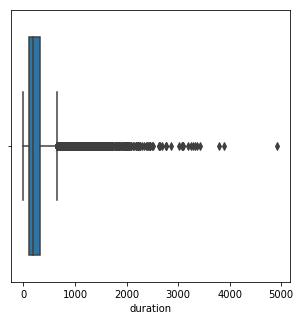

In [49]:
sns.boxplot(bank["duration"])

outliers in duration as well

# Base model

coverting categorical columns to numerical

In [50]:
b = pd.get_dummies(bank["job"],prefix="job",drop_first=True)

In [51]:
bank = pd.concat([bank,b],axis=1)

In [52]:
c = pd.get_dummies(bank["marital"],prefix="marital",drop_first=True)

In [53]:
bank = pd.concat([bank,c],axis=1)

In [54]:
d = pd.get_dummies(bank["contact"],prefix="contact",drop_first=True)

In [55]:
bank = pd.concat([bank,d],axis=1)

In [56]:
e = pd.get_dummies(bank["poutcome"],prefix="outcome",drop_first=True)

In [57]:
bank = pd.concat([bank,e],axis=1)

In [58]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,outcome_other,outcome_success,outcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,1,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,1,0,0,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,1,0,0,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,1,0,1,0,0,1


In [59]:
val = {"yes":1,"no":0}

In [60]:
bank["loan"]= bank["loan"].map(val)

In [61]:
bank["default"]=bank["default"].map(val)

In [62]:
bank["housing"]=bank["housing"].map(val)

In [63]:
bank["y"]=bank["y"].map(val)

In [64]:
val1 = {"unknown":0,"primary":1,"secondary":"2","tertiary":"3"}

In [65]:
bank["education"]=bank["education"].map(val1)

In [66]:
bank = bank.drop(["marital"],axis=1)

In [67]:
bank = bank.drop(["job"],axis=1)

In [68]:
bank = bank.drop(["contact"],axis=1)

In [69]:
bank = bank.drop(["poutcome"],axis=1)

In [70]:
mont = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}

In [71]:
month1 = {1:"moderate_month",2:"moderate_month",4:"moderate_month",11:"moderate_month",6:"busy_month",8:"busy_month",7:"busy_month",5:"busy_month",12:"low_month",3:"low_month",9:"low_month",10:"low_month"}

In [72]:
bank["month"]=bank["month"].map(mont)

In [73]:
bank["education"] = bank["education"].astype("int")

In [74]:
x = bank.drop(["y"],axis=1)
y = bank["y"]

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [76]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(x_train,y_train)

In [77]:
y_pred = logreg.predict(x_test)

In [78]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,r2_score
print("f1_score:",f1_score(y_test,y_pred))

f1_score: 0.42944785276073616


In [79]:
print("f1_score:",f1_score(y_test,y_pred))

f1_score: 0.42944785276073616


In [80]:
print("Train Accuracy:",accuracy_score(y_train,logreg.predict(x_train)))

Train Accuracy: 0.900519796505198


In [81]:
print("Test Accuracy:",accuracy_score(y_test,y_pred))

Test Accuracy: 0.8971580227800509


In [82]:
confusion_matrix(y_test,y_pred)

array([[7763,  217],
       [ 713,  350]], dtype=int64)

In [83]:
def create_conf_mat(test_class_set, predictions):
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

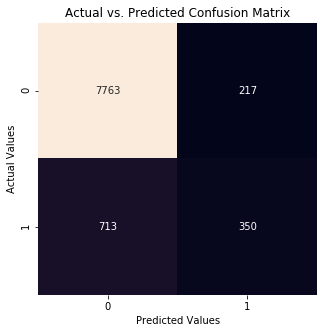

In [84]:
conf_mat = create_conf_mat(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [85]:
TN=7763
TP=350
FN=713
FP=217
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [86]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8971580227800509 

 The Miss-classification = 1-Accuracy =  0.10284197721994914 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.3292568203198495 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9728070175438597 

 Positive Predictive value = TP / (TP+FP) =  0.6172839506172839 

 Negative predictive Value = TN / (TN+FN) =  0.9158801321378008 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  12.10815403756867 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.6894925381743657


In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.33      0.43      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



binning our age column

In [90]:
bank["age_group"] = pd.cut(bank["age"],bins=[13,29,60,99],labels=["young","adult","old"])

In [3013]:
#bank["month"] = bank["month"].map(month1)

In [3014]:
#val1 ={"low_month":1,"moderate_month":2,"busy_month":3}
#bank["month"] = bank["month"].map(val1)

In [91]:
val = {"young":1,"adult":2,"old":3}
bank["age_group"] = bank["age_group"].map(val)

In [92]:
bank = bank.drop(["age"],axis=1)

In [93]:
x = bank.drop(["y"],axis=1)
y = bank["y"]

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [95]:
logreg = LogisticRegression()
logreg = logreg.fit(x_train,y_train)

In [96]:
y_pred = logreg.predict(x_test)

In [97]:
f1_score(y_test,y_pred)

0.41783649876135426

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11969
           1       0.61      0.32      0.42      1595

    accuracy                           0.90     13564
   macro avg       0.76      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564



In [99]:
confusion_matrix(y_test,y_pred)

array([[11648,   321],
       [ 1089,   506]], dtype=int64)

In [100]:
bank.columns

Index(['education', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'contact_telephone', 'contact_unknown', 'outcome_other',
       'outcome_success', 'outcome_unknown', 'age_group'],
      dtype='object')

In [101]:
pd.options.display.max_columns=None

In [102]:
bank.shape

(45211, 31)

In [103]:
from imblearn.over_sampling import SMOTE

In [104]:
bank["duration"] = bank["duration"]//60

In [105]:
bank = bank[bank["balance"]<=20000]

In [106]:
bank = bank[(bank["balance"]<10000) ]

In [107]:
bank = bank[bank["balance"]>-5000]

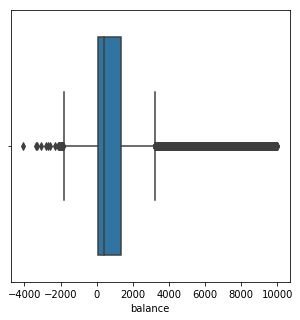

In [109]:
sns.boxplot(bank["balance"])

# VIF

In [1581]:
def VIF(formula,data):
    import pip #To install packages
    #pip.main(["install","dmatrices"])
    #pip.main(["install","statsmodels"])
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) \
       for i in range(X.shape[1])]
    vif["features"] = X.columns
    return(vif.round(1))

In [1595]:
bank.columns

Index(['education', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_bluecollar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_selfemployed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'contact_telephone', 'contact_unknown', 'outcome_other',
       'outcome_success', 'outcome_unknown', 'age_group'],
      dtype='object')

In [1594]:
bank = bank.rename(columns={"job_self-employed":"job_selfemployed","job_blue-collar":"job_bluecollar"})

In [1596]:
VIF("y ~education +default +balance +housing +loan +day +month +duration +campaign +pdays +previous  +job_entrepreneur +job_housemaid +job_selfemployed +job_bluecollar +job_management +job_retired +job_services +job_student +job_technician +job_unemployed +job_unknown +marital_married +marital_single +contact_telephone +contact_unknown +outcome_other +outcome_success +outcome_unknown +age_group",data=bank)

,VIF Factor,features
0,134.9,Intercept
1,1.5,education
2,1.0,default
3,1.0,balance
4,1.2,housing
5,1.0,loan
6,1.0,day
7,1.3,month
8,1.0,duration
9,1.1,campaign


outcome_unknown is having high multicollinearity

# Near Miss

In [1637]:
undersample_X = bank.drop('y', axis=1)
undersample_y = bank['y']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 


Train: [ 8988  8989  8990 ... 45208 45209 45210] Test: [   0    1    2 ... 9418 9420 9434]
Train: [    0     1     2 ... 45208 45209 45210] Test: [ 8988  8989  8990 ... 18263 18266 18267]
Train: [    0     1     2 ... 45208 45209 45210] Test: [18053 18054 18055 ... 27217 27220 27229]
Train: [    0     1     2 ... 45208 45209 45210] Test: [27108 27110 27111 ... 36447 36451 36452]
Train: [    0     1     2 ... 36447 36451 36452] Test: [36133 36137 36138 ... 45208 45209 45210]


In [1638]:
from imblearn.under_sampling import NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)

In [1693]:
log_reg = LogisticRegression()
print(classification_report(undersample_ytest,(nb.fit(X_nearmiss, y_nearmiss).predict(undersample_Xtest))))

              precision    recall  f1-score   support

           0       0.94      0.60      0.73      7984
           1       0.19      0.69      0.29      1057

    accuracy                           0.61      9041
   macro avg       0.56      0.64      0.51      9041
weighted avg       0.85      0.61      0.68      9041



# Tokem links

In [1782]:
x = bank.drop(["y"],axis=1)
y = bank["y"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [1783]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(return_indices=True, ratio='majority')
x1,y1,id1=tl.fit_resample(x_train, y_train)

In [1784]:
print(classification_report(y_test,(gb.fit(x1,y1).predict(x_test))))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7969
           1       0.62      0.49      0.54      1074

    accuracy                           0.90      9043
   macro avg       0.77      0.72      0.74      9043
weighted avg       0.90      0.90      0.90      9043



# Under-sampling: Cluster Centroids


In [1785]:
x = bank.drop(["y"],axis=1)
y = bank["y"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [1790]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
x_cc, y_cc = cc.fit_resample(x_train, y_train)

In [1791]:
print(classification_report(y_test,(lg.fit(x_cc,y_cc).predict(x_test))))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02      7969
           1       0.12      1.00      0.21      1074

    accuracy                           0.13      9043
   macro avg       0.56      0.51      0.12      9043
weighted avg       0.90      0.13      0.04      9043



# smote

In [1824]:
x = bank.drop(["y"],axis=1)
y = bank["y"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [1832]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio="minority")
X_sm, y_sm = smote.fit_resample(x_train, y_train)

In [1798]:
print(classification_report(y_test,(gb.fit(X_sm,y_sm).predict(x_test))))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      7969
           1       0.48      0.65      0.55      1074

    accuracy                           0.87      9043
   macro avg       0.71      0.78      0.74      9043
weighted avg       0.89      0.87      0.88      9043



# Over-sampling followed by under-sampling


In [2246]:
x = bank.drop(["y"],axis=1)
y = bank["y"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [2247]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
x_smt, y_smt = smt.fit_resample(x_train, y_train)

In [2248]:
print(classification_report(y_test,(lr.fit(x_smt,y_smt).predict(x_test))))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      7980
           1       0.31      0.86      0.45      1063

    accuracy                           0.76      9043
   macro avg       0.64      0.80      0.65      9043
weighted avg       0.90      0.76      0.80      9043



# smote using pipeline

In [1812]:
x = bank.drop(["y"],axis=1)
y = bank["y"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [1813]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

pipe = make_pipeline(SMOTE(),LogisticRegression())

print(classification_report(y_test,(pipe.fit(x_train,y_train).predict(x_test))))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7969
           1       0.46      0.51      0.48      1074

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.70      9043
weighted avg       0.88      0.87      0.87      9043



# smote

In [2093]:
x = bank.drop(["y"],axis=1)
y = bank["y"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [2089]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [2091]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
x_train = mn.fit_transform(x_train)
x_test = mn.transform(x_test)

In [2095]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

pipe = make_pipeline(SMOTE(),GradientBoostingClassifier())

print(classification_report(y_test,(pipe.fit(x_train,y_train).predict(x_test))))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7969
           1       0.43      0.65      0.52      1074

    accuracy                           0.86      9043
   macro avg       0.69      0.77      0.72      9043
weighted avg       0.89      0.86      0.87      9043



# Ensemble

In [136]:
x = bank.drop(["y","job_unknown","default","job_retired","previous"],axis=1)
y = bank["y"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [137]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
x_train3,y_train3 = SMOTETomek().fit_resample(x_train,y_train)
x_train2,y_train2 = SMOTE().fit_resample(x_train,y_train)
x_train4,y_train4 = RandomUnderSampler().fit_resample(x_train,y_train)

In [138]:
rf1 = RandomForestClassifier(n_estimators=80,criterion="gini",max_depth = 13,min_samples_leaf=20)
print(classification_report(y_test,rf1.fit(x_train3,y_train3).predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      7831
           1       0.47      0.71      0.57      1045

    accuracy                           0.87      8876
   macro avg       0.72      0.80      0.75      8876
weighted avg       0.90      0.87      0.88      8876



In [139]:
rf1 = RandomForestClassifier(n_estimators=80,criterion="gini",max_depth = 13,min_samples_leaf=20)
print(classification_report(y_test,rf1.fit(x_train4,y_train4).predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7831
           1       0.39      0.90      0.54      1045

    accuracy                           0.82      8876
   macro avg       0.69      0.86      0.71      8876
weighted avg       0.91      0.82      0.85      8876



In [140]:
rf1 = RandomForestClassifier(n_estimators=80,criterion="gini",max_depth = 13,min_samples_leaf=15)
print(classification_report(y_test,rf1.fit(x_train2,y_train2).predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      7831
           1       0.48      0.70      0.57      1045

    accuracy                           0.88      8876
   macro avg       0.72      0.80      0.75      8876
weighted avg       0.90      0.88      0.89      8876



In [141]:
rf1 = RandomForestClassifier(n_estimators=70,criterion="gini",max_depth = 13,min_samples_leaf=15)
print(classification_report(y_test,rf1.fit(x_train4,y_train4).predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7831
           1       0.38      0.90      0.54      1045

    accuracy                           0.82      8876
   macro avg       0.68      0.86      0.71      8876
weighted avg       0.91      0.82      0.85      8876



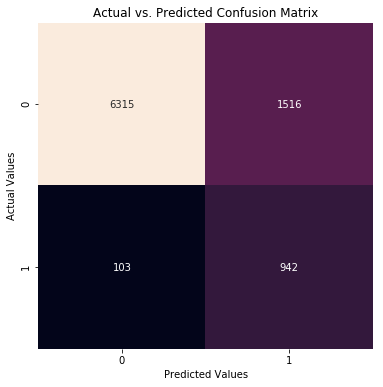

In [142]:
rcParams["figure.figsize"] = 6,6
conf_mat = create_conf_mat(y_test, rf1.fit(x_train4,y_train4).predict(x_test))
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

Our false negatives reduced from 713 to 103